## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [2]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Random state seed
rseed = 42

## Load and explore data

In [4]:
# Import the dataset
df = pd.read_csv('Country-data.csv')
df.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.500,68.8,2.34,1380
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.900,68.2,4.98,1200
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
147,Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702
130,Serbia,7.6,32.9,10.40,47.9,12700,5.880,74.7,1.40,5410


In [6]:
# Check the shape
print('Shape of dataframe: ', df.shape)

Shape of dataframe:  (167, 10)


In [16]:
# Check datatypes & counts
print('Datatypes and counts: \n', df.dtypes)

Datatypes and counts: 
 country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [17]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [18]:
# Identify any missing data
df.isnull().sum()

country 0
child_mort 0
exports 0
health 0
imports 0
income 0
inflation 0
life_expec 0
total_fer 0
gdpp 0
dtype: int64

## Preprocessing and Feature Selection

In [19]:
# Drop any non-numeric features (columns)
df = df.drop('country', axis = 1)

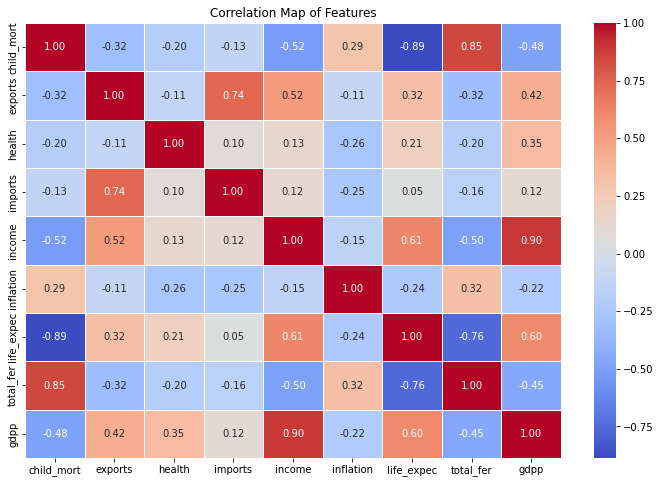

In [21]:
# # Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap  

# Calculate the correlation matrix
corr_matrix = df.corr()

# Draw the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5)
plt.title('Correlation Map of Features')
plt.show()

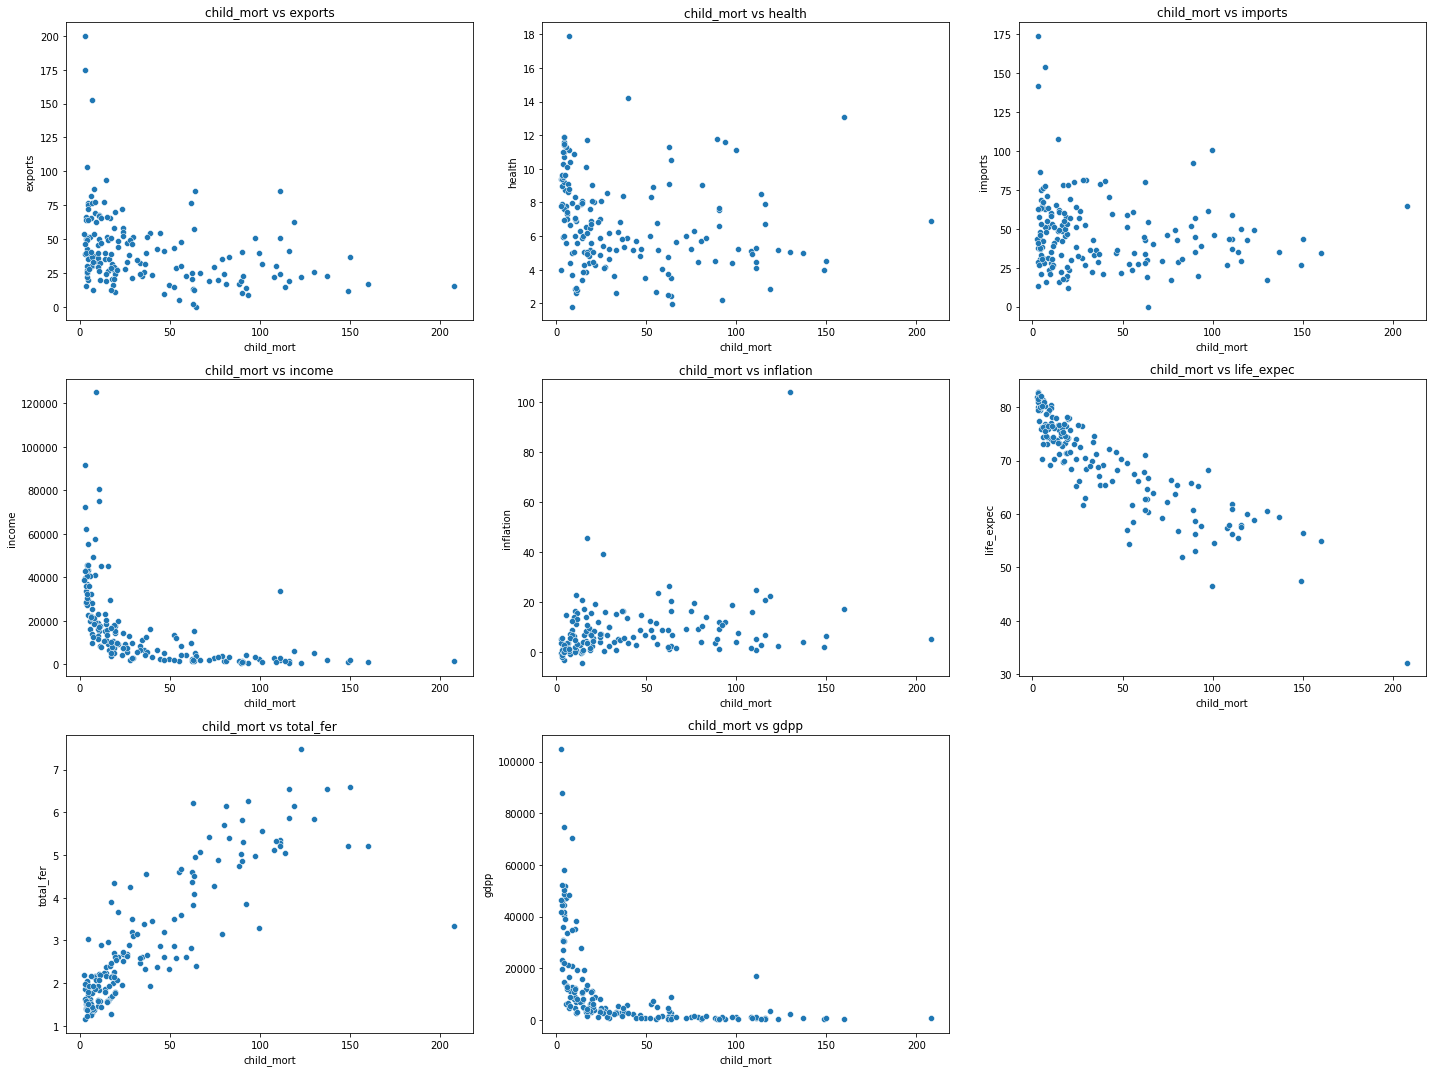

In [22]:
# # Explore the continuous independent features against child_mort using scatter plots. 
features = df.columns.drop('child_mort')

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x='child_mort', y=feature)
    plt.title('child_mort vs {}'.format(feature))

plt.tight_layout()
plt.show()

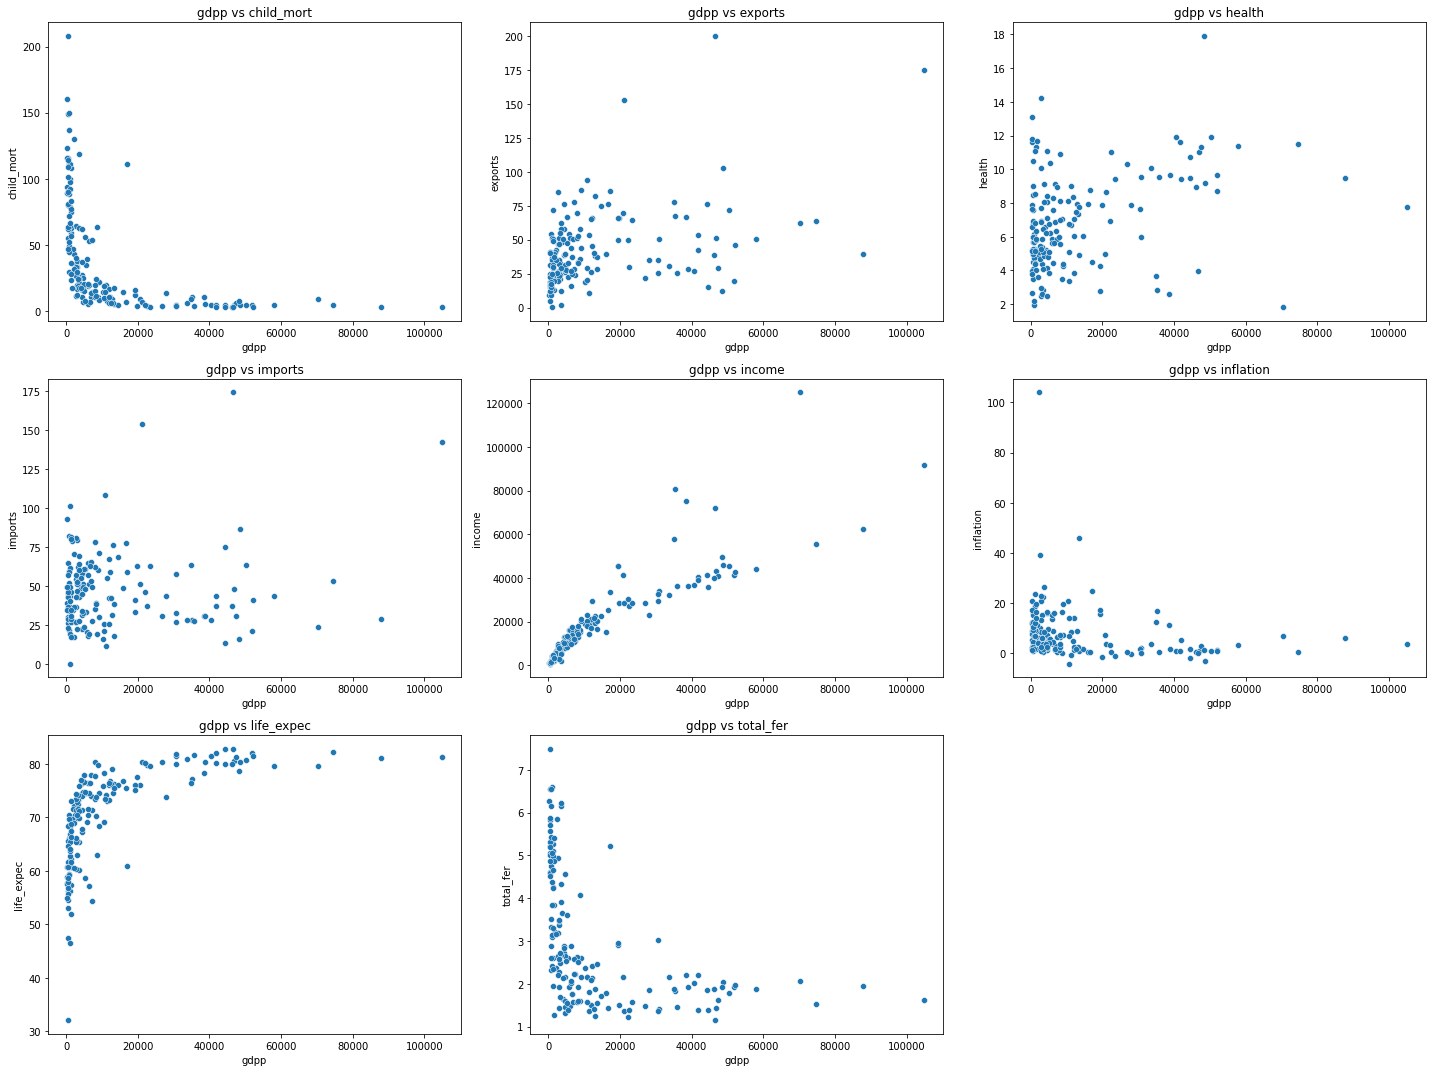

In [26]:
# # Explore the continuous independent features against gdpp using scatter plots. 
features = df.columns.drop('gdpp')

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x='gdpp', y=feature)
    plt.title('gdpp vs {}'.format(feature))

plt.tight_layout()
plt.show()

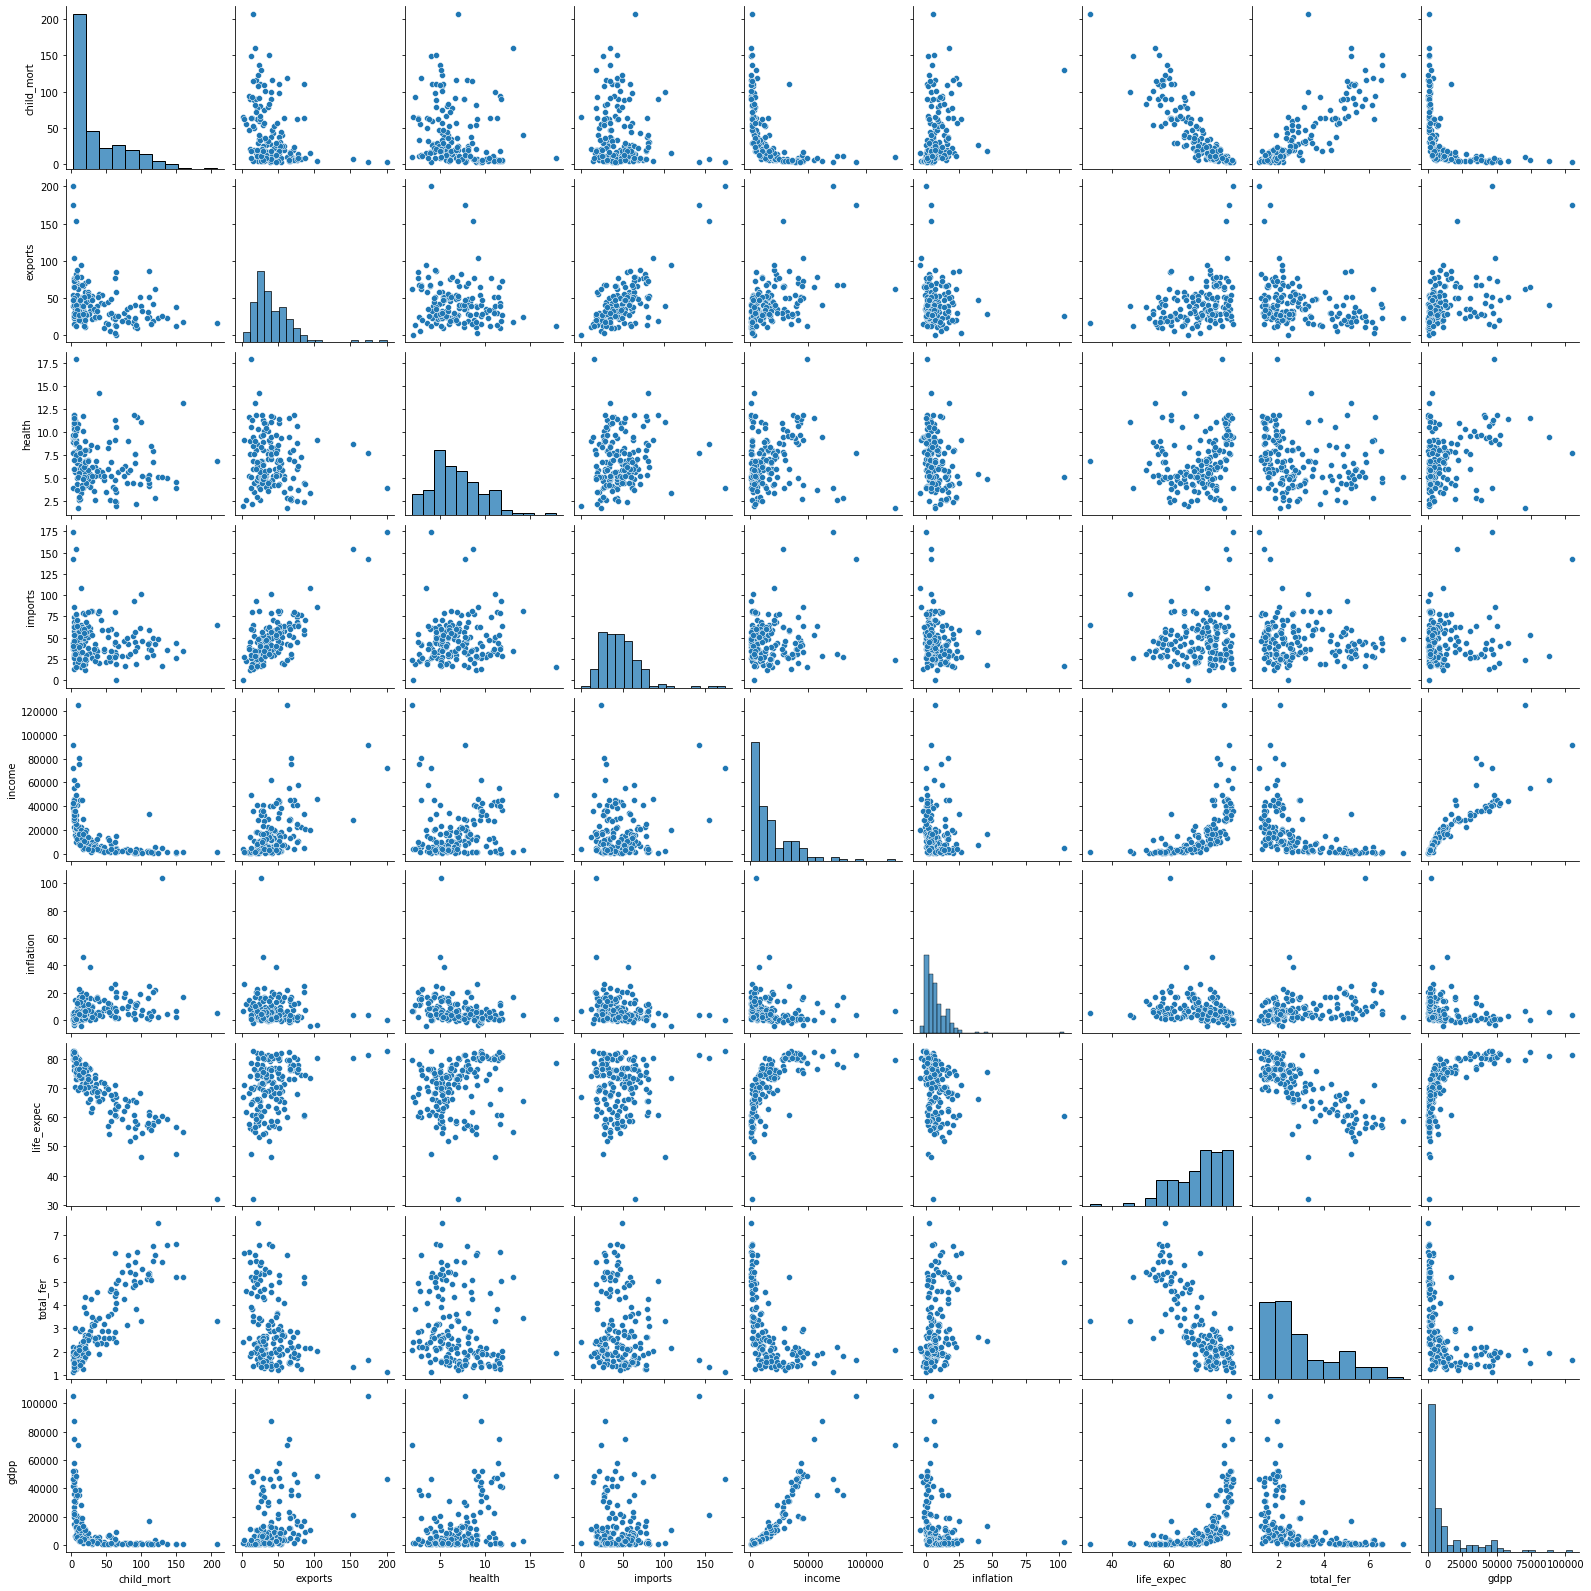

In [28]:
# # Create a pair plot 

sns.pairplot(df)
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [30]:
# # Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled" 
scaler = MinMaxScaler()

# Apply transformation and create a new DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

# Show the head of the dataframe
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

In [31]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

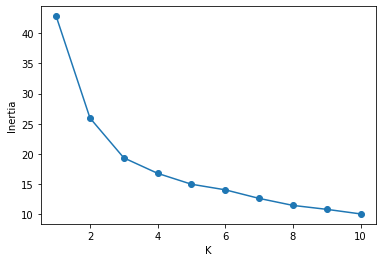

In [33]:
# Plot elbow curve using scaled dataset 
elbow_Kmeans(df_scaled)

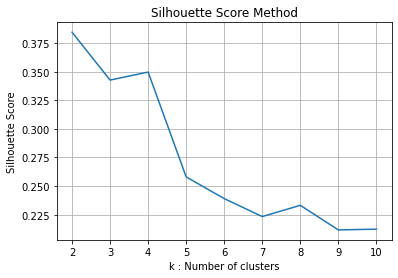

In [34]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [38]:
# Select number of clusters based on insights from elbow and silhouette analysis
k = 2  

# fit Kmeans model with k clusters
kmeans = KMeans(n_clusters=k, random_state=rseed)
kmeans.fit(df_scaled)

# get cluster labels 
labels = kmeans.labels_

# Print output
print("K-Means Clustering with K =", k)
print("Labels:", labels)

K-Means Clustering with K = 2
Labels: [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1]


In [41]:
# Count the number of records in each cluster 

# Adding the labels to df for easy counting in each cluster
df['cluster_id'] = labels
df['cluster_id'].value_counts()

0 116
1 51
Name: cluster_id, dtype: int64

In [43]:
# # Check model performance with the silhouette coefficient 

def silhouette_coefficient(labels, data):
    score = metrics.silhouette_score(data, labels, metric='euclidean')
    print('Silhouette Coefficient: {:.2f}'.format(score))

# Calling the function to calculate and print the silhouette coefficient
silhouette_coefficient(labels, df_scaled)

Silhouette Coefficient: 0.38


## Predictions

In [44]:
# # Add the predicted cluster label column to the original dataframe 
df['predicted_cluster'] = labels

# Display df to confirm "predicted_cluster" column has been added.
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,predicted_cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


## Visualisation of clusters

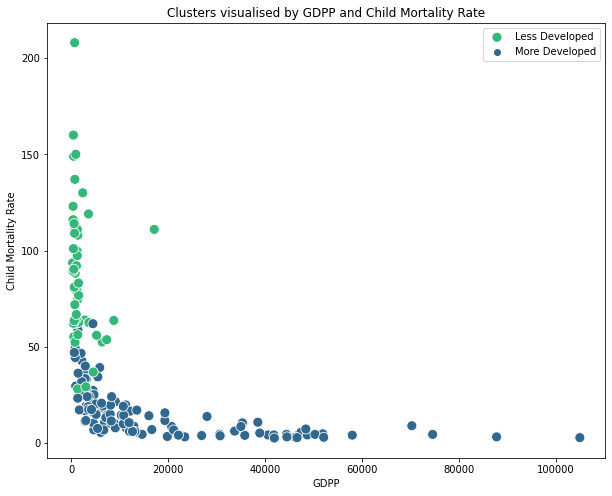

In [57]:
# Visualisation of clusters: child mortality vs gdpp 

# Create a scatter plot 
plt.figure(figsize=(10, 8))

# Visualise the clusters using color encoding
sns.scatterplot(data=df, x='gdpp', y='child_mort', hue='cluster_id', palette='viridis', s=100)

# Map cluster IDs to custom names
cluster_names = {1: 'Less Developed', 0: 'More Developed'}

# Assign custom names to legend labels
legend_labels = [f'{cluster_names[c]}' for c in df['cluster_id'].unique()]

# Add legend with custom labels
plt.legend(legend_labels, loc='upper right')

# Provide a title
plt.title('Clusters visualised by GDPP and Child Mortality Rate')

# Label x-y axis
plt.xlabel('GDPP')
plt.ylabel('Child Mortality Rate')

# Show plot
plt.show()


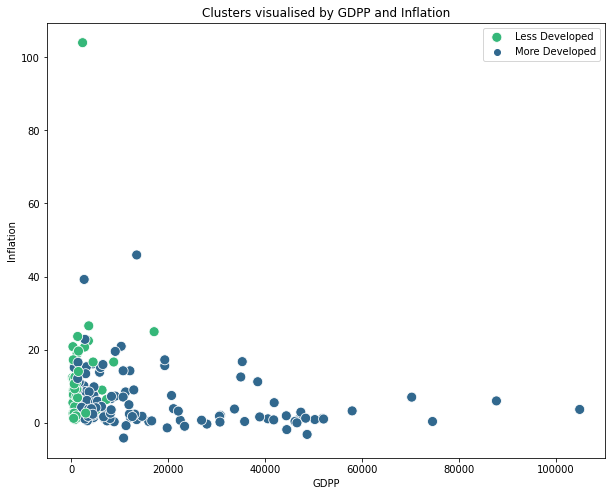

In [58]:
# Visualisation of clusters: inflation vs gdpp

# Create a scatter plot 
plt.figure(figsize=(10, 8))

# Visualise the clusters using color encoding
sns.scatterplot(data=df, x='gdpp', y='inflation', hue='cluster_id', palette='viridis', s=100)

# Map cluster IDs to custom names
cluster_names = {1: 'Less Developed', 0: 'More Developed'}

# Assign custom names to legend labels
legend_labels = [f'{cluster_names[c]}' for c in df['cluster_id'].unique()]

# Add legend with custom labels
plt.legend(legend_labels, loc='upper right')

# Provide a title
plt.title('Clusters visualised by GDPP and Inflation')

# Label x-y axis
plt.xlabel('GDPP')
plt.ylabel('Inflation')

# Show plot
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use terms such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

For both plots, I would label the blue cluster 'More Developed' and the green cluster 'Less Developed'. I would add these labels because the green cluster shows higher child mortality, higher inflation and lower GDP, all of which are associated with less developed countries.